In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from pandas.api.types import CategoricalDtype

# Optional: for interactive plots
import plotly.express as px

In [11]:
data_path = r"D:\ecomerce\E-commerce.csv"
df = pd.read_csv(data_path)

# Quick overview
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())

Dataset Shape: (50, 9)

Columns: ['Customer ID', 'Age', 'Gender', 'Location', 'Annual Income', 'Purchase History', 'Browsing History', 'Product Reviews', 'Time on Site']

First 5 rows:


,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site
0,1001,25,Female,City D,45000,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...","Great pair of jeans, very comfortable. Rating:...",32.50
1,1001,28,Female,City D,52000,"[{""Product Category"": ""Clothing"", ""Purchase Da...","[{""Product Category"": ""Home & Garden"", ""Timest...",Great customer service!,123.45
2,1001,28,Female,City D,65000,"[{""Product Category"": ""Electronics"", ""Purchase...","[{""Product Category"": ""Clothing"", ""Timestamp"":...",Great electronics. The sound quality is excell...,125.60
3,1001,45,Female,City D,70000,"{'Purchase Date': '2022-08-15', 'Product Categ...",{'Timestamp': '2022-09-03 14:30:00'},"{""Product 1"": {""Rating"": 4, ""Review"": ""Great e...",327.60
4,1002,34,Male,City E,45000,"{'Purchase Date': '2022-07-25', 'Product Categ...",{'Timestamp': '2022-08-10 17:15:00'},"{""Product 1"": {""Rating"": 3, ""Review"": ""Good pr...",214.90


In [13]:
print("\nData Info:")
df.info()

print("\nStatistical Summary (Numerical Columns):")
display(df.describe(include='all'))

print("\nStatistical Summary (Categorical Columns):")
display(df.describe(include='object'))


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       50 non-null     int64  
 1   Age               50 non-null     int64  
 2   Gender            50 non-null     object 
 3   Location          50 non-null     object 
 4   Annual Income     50 non-null     int64  
 5   Purchase History  50 non-null     object 
 6   Browsing History  50 non-null     object 
 7   Product Reviews   50 non-null     object 
 8   Time on Site      50 non-null     float64
dtypes: float64(1), int64(3), object(5)
memory usage: 3.6+ KB

Statistical Summary (Numerical Columns):


,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site
count,50.000000,50.000000,50,50,50.000000,50,50,50,50.000000
unique,NaN,NaN,3,16,NaN,50,50,47,NaN
top,NaN,NaN,Female,City D,NaN,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...","{""Review Text"": ""Excellent product, highly rec...",NaN
freq,NaN,NaN,26,12,NaN,1,1,3,NaN
mean,1004.880000,39.960000,NaN,NaN,65780.000000,NaN,NaN,NaN,232.597000
std,3.623281,11.067437,NaN,NaN,17059.667198,NaN,NaN,NaN,109.669736
min,1001.000000,24.000000,NaN,NaN,40000.000000,NaN,NaN,NaN,32.500000
25%,1002.000000,30.250000,NaN,NaN,50500.000000,NaN,NaN,NaN,124.100000
50%,1004.000000,37.000000,NaN,NaN,65000.000000,NaN,NaN,NaN,243.450000
75%,1007.750000,48.000000,NaN,NaN,80000.000000,NaN,NaN,NaN,300.000000



Statistical Summary (Categorical Columns):


,Gender,Location,Purchase History,Browsing History,Product Reviews
count,50,50,50,50,50
unique,3,16,50,50,47
top,Female,City D,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...","{""Review Text"": ""Excellent product, highly rec..."
freq,26,12,1,1,3


In [15]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df) * 100).round(2)
missing_df = pd.DataFrame({'missing_count': missing_values, 'missing_percent': missing_percent})
display(missing_df)

,missing_count,missing_percent
Customer ID,0,0.0
Age,0,0.0
Gender,0,0.0
Location,0,0.0
Annual Income,0,0.0
Purchase History,0,0.0
Browsing History,0,0.0
Product Reviews,0,0.0
Time on Site,0,0.0


In [17]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

# Value counts for categorical variables
for col in categorical_cols:
    print(f"\nColumn: {col}")
    display(df[col].value_counts().head(10)) 

Categorical Columns: ['Gender', 'Location', 'Purchase History', 'Browsing History', 'Product Reviews']
Numerical Columns: ['Customer ID', 'Age', 'Annual Income', 'Time on Site']

Column: Gender


Gender
Female    26
Male      18
Other      6
Name: count, dtype: int64


Column: Location


Location
City D    12
City E     6
City F     5
City G     4
City H     4
City I     3
City J     3
City K     3
City L     3
City A     1
Name: count, dtype: int64


Column: Purchase History


Purchase History
[{"Date": "2022-03-05", "Category": "Clothing", "Price": 34.99}, {"Date": "2022-02-12", "Category": "Electronics", "Price": 129.99}, {"Date": "2022-01-20", "Category": "Home & Garden", "Price": 29.99}]    1
{'Purchase Date': '2022-05-19', 'Product Category': 'Clothing', 'Price': 120},{'Purchase Date': '2022-06-07', 'Product Category': 'Home & Garden', 'Price': 150}                                             1
{'Purchase Date': '2022-05-28', 'Product Category': 'Clothing', 'Price': 75},{'Purchase Date': '2022-06-10', 'Product Category': 'Home & Garden', 'Price': 120}                                              1
{'Purchase Date': '2022-05-08', 'Product Category': 'Electronics', 'Price': 200},{'Purchase Date': '2022-06-05', 'Product Category': 'Home & Garden', 'Price': 150}                                          1
{'Purchase Date': '2022-05-18', 'Product Category': 'Clothing', 'Price': 50},{'Purchase Date': '2022-06-07', 'Product Category': 'Home & Garden', 'Price': 


Column: Browsing History


Browsing History
[{"Timestamp": "2022-03-10T14:30:00Z"}, {"Timestamp": "2022-03-11T09:45:00Z"}, {"Timestamp": "2022-03-12T16:20:00Z"}]    1
{'Timestamp': '2022-06-08T14:30:00Z'}                                                                                    1
{'Timestamp': '2022-06-01T09:15:00Z'}                                                                                    1
{'Timestamp': '2022-05-22T10:30:00Z'}                                                                                    1
{'Timestamp': '2022-05-30T13:45:00Z'}                                                                                    1
{'Timestamp': '2022-06-06T08:00:00Z'}                                                                                    1
{'Timestamp': '2022-06-15T11:30:00Z'}                                                                                    1
{'Timestamp': '2022-05-28T15:15:00Z'}                                                                                    1


Column: Product Reviews


Product Reviews
{"Review Text": "Excellent product, highly recommend!", "Rating": 5}                   3
{"Product 1": {"Rating": 4, "Review": "Great product, will definitely buy again."}}    2
Great pair of jeans, very comfortable. Rating: 4 stars.                                1
Great find! 5 stars                                                                    1
The phone is fantastic. 5 stars!                                                       1
The shirt is comfortable. 4 stars.                                                     1
The laptop is excellent. 5 stars!                                                      1
The shoes are comfortable. 4.5 stars.                                                  1
The coffee maker is great. 5 stars!                                                    1
The skirt is lovely. 4.5 stars.                                                        1
Name: count, dtype: int64

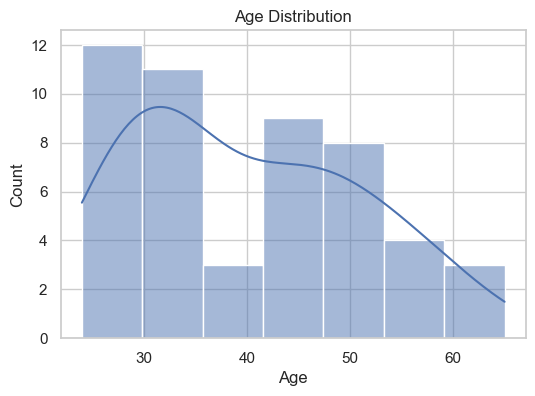

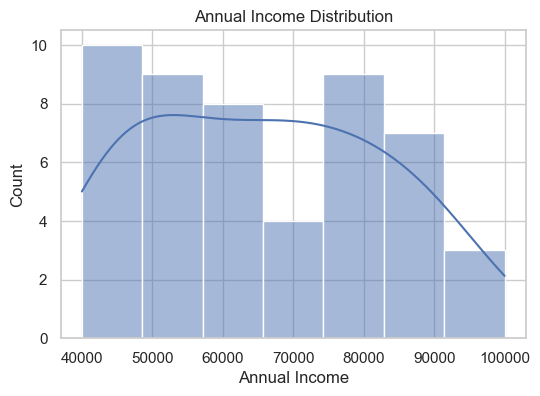

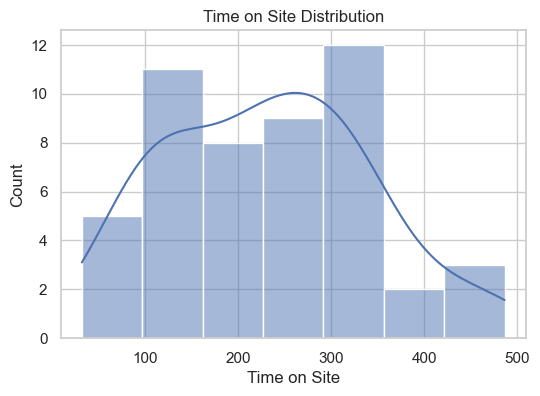

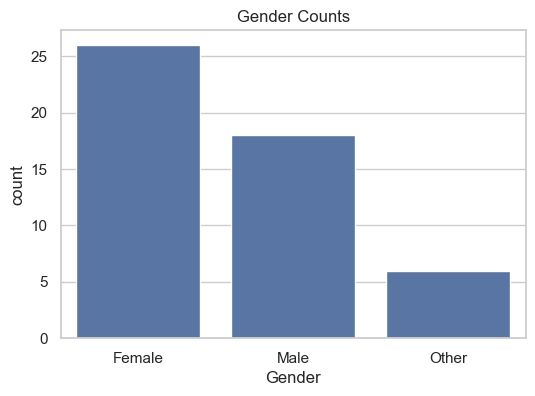

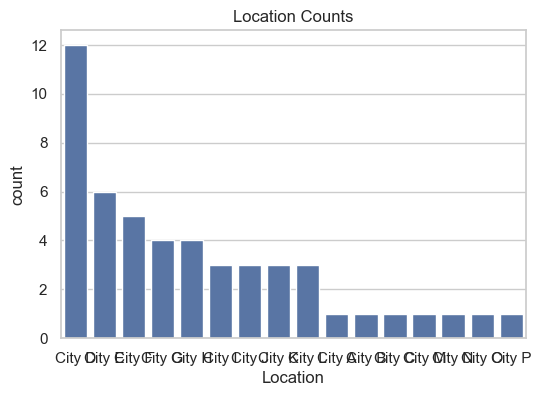

In [19]:
numeric_features = ['Age', 'Annual Income', 'Time on Site']
categorical_features = ['Gender', 'Location']

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.show()

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Counts')
    plt.show()

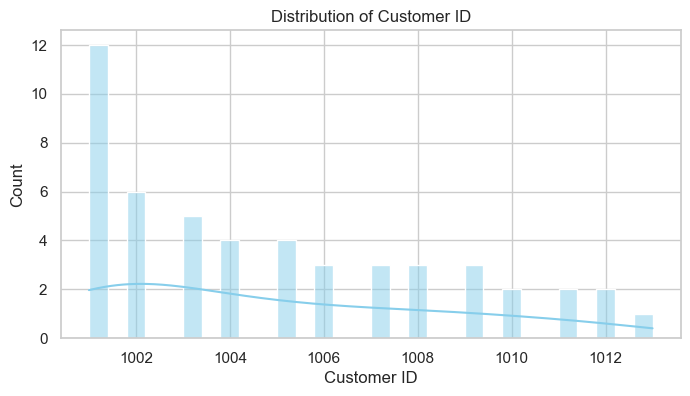

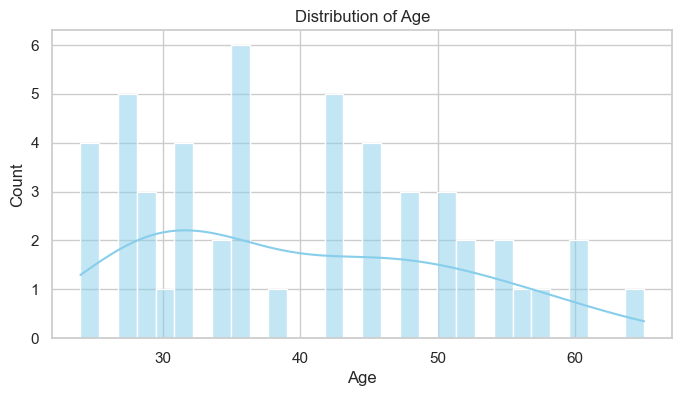

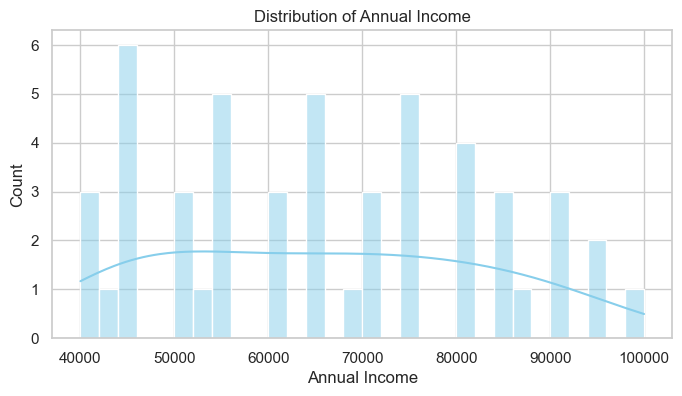

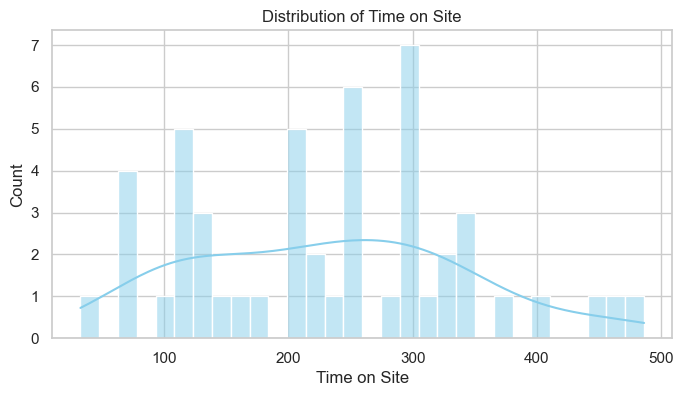

C:\Users\Vedansh\AppData\Local\Temp\ipykernel_5540\985167235.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set2')


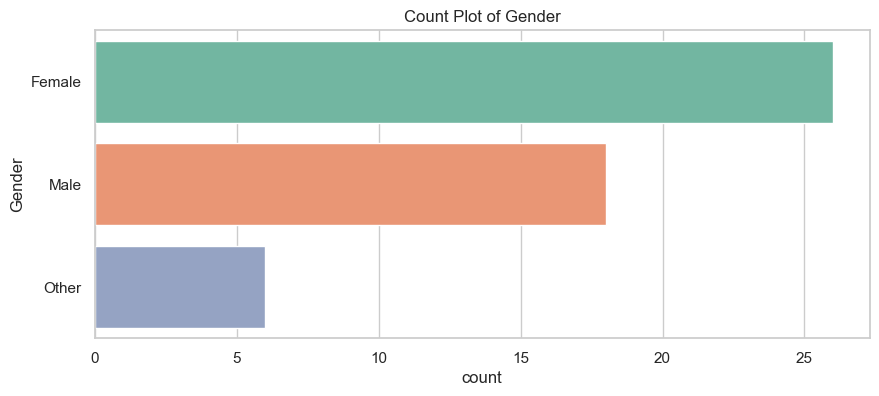

C:\Users\Vedansh\AppData\Local\Temp\ipykernel_5540\985167235.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set2')


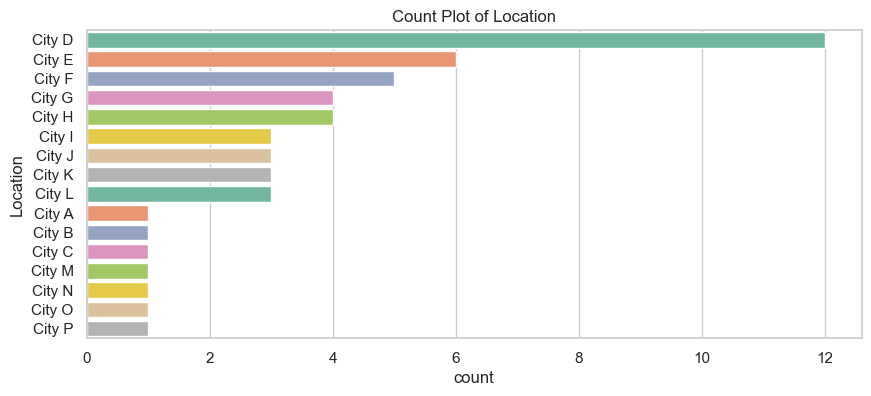

C:\Users\Vedansh\AppData\Local\Temp\ipykernel_5540\985167235.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set2')


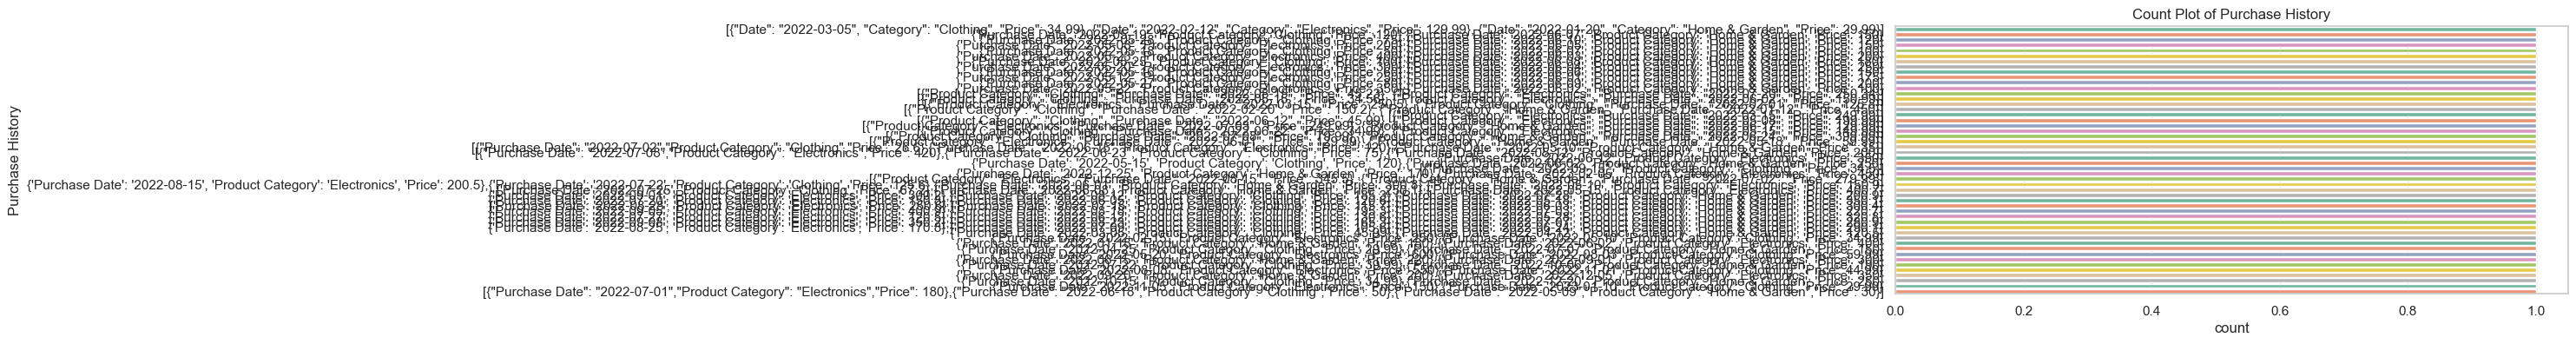

C:\Users\Vedansh\AppData\Local\Temp\ipykernel_5540\985167235.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set2')


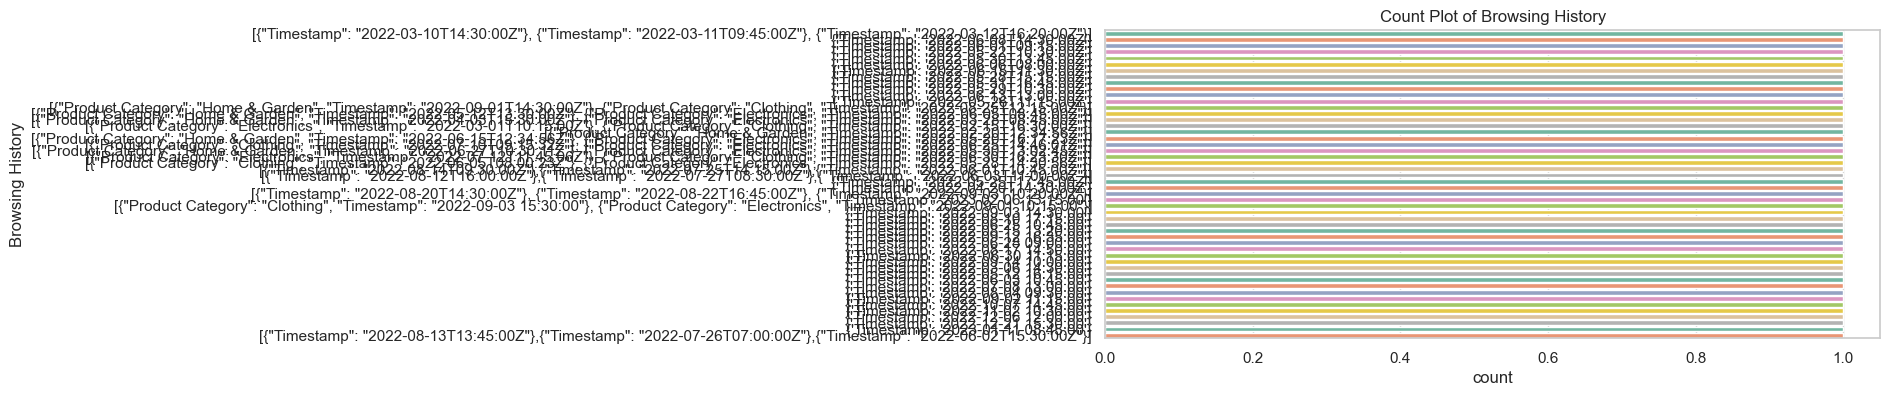

C:\Users\Vedansh\AppData\Local\Temp\ipykernel_5540\985167235.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set2')


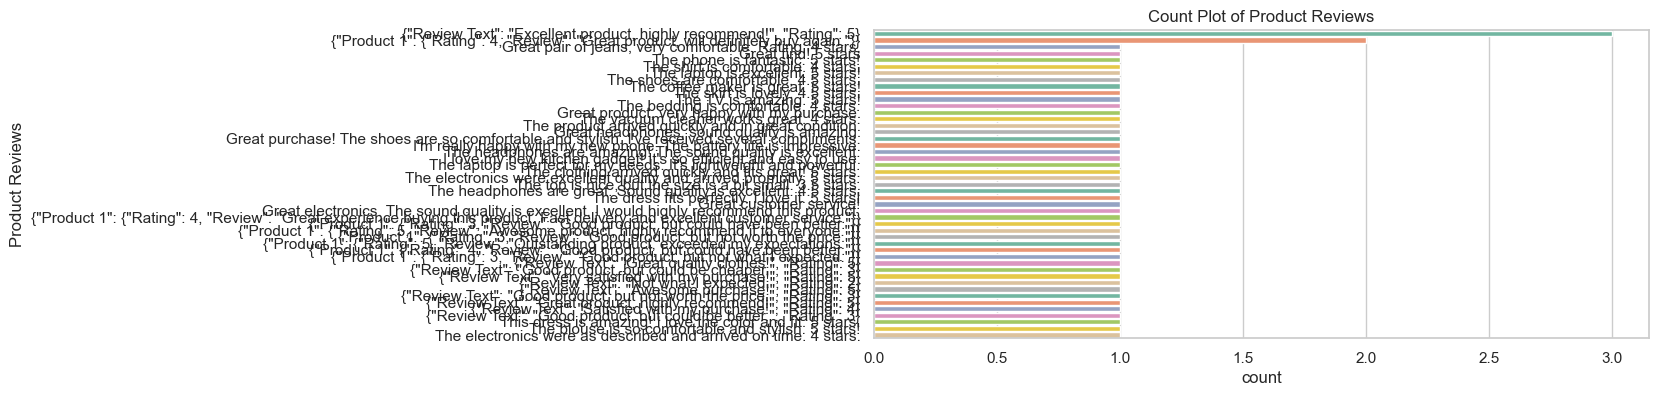

In [21]:
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical distributions
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.show()

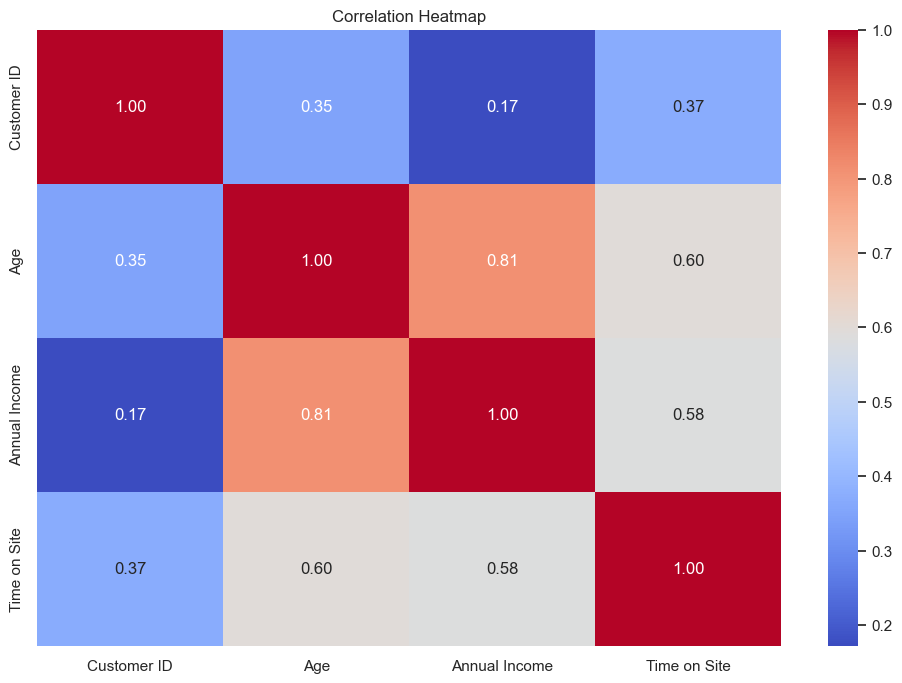

In [23]:
plt.figure(figsize=(12,8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

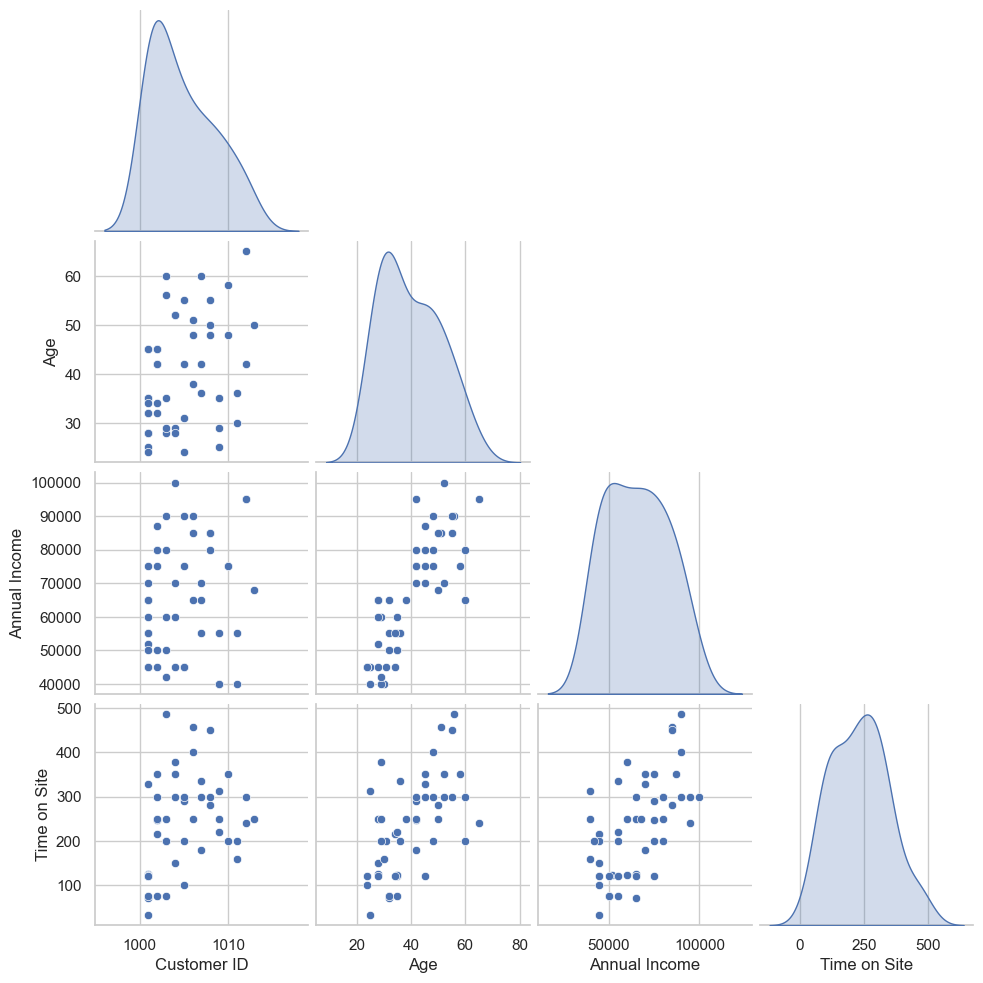

In [25]:
if len(numerical_cols) <= 6:  # avoid very large pairplots
    sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True)
    plt.show()

In [27]:
if 'category' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='category', y='price', data=df)
    plt.title("Price Distribution Across Categories")
    plt.show()


# Modal analysis: most frequent values per categorical column
modal_df = pd.DataFrame(columns=['Column', 'Mode', 'Mode_Count', 'Mode_Percent'])
for col in df.select_dtypes(include=['object', 'category', 'int', 'float']).columns:
    mode_val = df[col].mode()[0]
    count = df[col].value_counts()[mode_val]
    percent = (count / len(df) * 100).round(2)
    modal_df.loc[len(modal_df)] = [col, mode_val, count, percent]
display(modal_df)

,Column,Mode,Mode_Count,Mode_Percent
0,Customer ID,1001,12,24.0
1,Age,28,5,10.0
2,Gender,Female,26,52.0
3,Location,City D,12,24.0
4,Annual Income,45000,6,12.0
5,Purchase History,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...",1,2.0
6,Browsing History,"[{""Product Category"": ""Clothing"", ""Timestamp"":...",1,2.0
7,Product Reviews,"{""Review Text"": ""Excellent product, highly rec...",3,6.0
8,Time on Site,200.0,5,10.0


In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Convert categorical features
le_gender = LabelEncoder()
df['Gender_encoded'] = le_gender.fit_transform(df['Gender'])

le_location = LabelEncoder()
df['Location_encoded'] = le_location.fit_transform(df['Location'])

In [31]:
# Purchase history features
def extract_purchase_features(purchase_list):
    """Calculate total spend and total purchases."""
    try:
        purchases = json.loads(purchase_list.replace("'", '"'))
        total_spent = sum([item['Price'] for item in purchases])
        total_items = len(purchases)
    except:
        total_spent = 0
        total_items = 0
    return pd.Series([total_spent, total_items])

df[['Total_Spent', 'Total_Purchases']] = df['Purchase History'].apply(extract_purchase_features)


# Browsing history features
def extract_browsing_features(browsing_list):
    try:
        views = json.loads(browsing_list.replace("'", '"'))
        total_views = len(views)
    except:
        total_views = 0
    return total_views

df['Total_Views'] = df['Browsing History'].apply(extract_browsing_features)

# Product review rating
def extract_review_rating(review_list):
    try:
        review = json.loads(review_list.replace("'", '"'))
        if isinstance(review, dict) and 'Rating' in review:
            return review['Rating']
        elif isinstance(review, dict):
            return list(review.values())[0]['Rating']
    except:
        return np.nan
df['Review_Rating'] = df['Product Reviews'].apply(extract_review_rating).fillna(0)
# Derived target for purchase likelihood
df['Made_Purchase'] = (df['Total_Purchases'] > 0).astype(int)

In [35]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/72.0 MB 306.3 kB/s eta 0:03:55
   ---------------------------------------- 0.1/72.0 MB 306.3 kB/s eta 0:03:55
   ---------------------------------------- 0.1/72.0 MB 249.8 kB/s eta 0:04:48
   ---------------------------------------- 0.1/72.0 MB 273.1 kB/s eta 0:04:24
   ---------------------------------------- 0.1/72.0 MB 266.9 kB/s eta 0:04:30
   ---------------------------------------- 0.2/72.0 MB 327.5 kB/s eta 0:03:40
   ---------------------------------------- 0.2/72.0 MB 366.4 kB/s eta 0:03:16
   ------------------------

In [37]:
import json


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

In [39]:
features_classification = ['Age', 'Gender_encoded', 'Location_encoded', 'Annual Income', 'Time on Site', 'Total_Views', 'Review_Rating']
X = df[features_classification]
y_purchase = df['Made_Purchase']
y_clv = df['Total_Spent']
y_rating = df['Review_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y_purchase, test_size=0.2, random_state=42)

In [41]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Purchase Likelihood Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Purchase Likelihood Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y_clv, test_size=0.2, random_state=42)
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)
y_pred_clv = reg.predict(X_test)
print("CLV RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_clv)))
print("CLV R2 Score:", r2_score(y_test, y_pred_clv))

CLV RMSE: 116.59946375646837
CLV R2 Score: 0.7787059167941479


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y_rating, test_size=0.2, random_state=42)
reg_rating = RandomForestRegressor(n_estimators=100, random_state=42)
reg_rating.fit(X_train, y_train)
y_pred_rating = reg_rating.predict(X_test)
print("Rating RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rating)))
print("Rating R2 Score:", r2_score(y_test, y_pred_rating))

Rating RMSE: 0.09828529900244477
Rating R2 Score: 0.9977054631828979


In [55]:
df['Churn'] = (df['Total_Purchases'] == 0).astype(int)
X = df[features_classification]
y_churn = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y_churn, test_size=0.2, random_state=42)
clf_churn = RandomForestClassifier(n_estimators=100, random_state=42)
clf_churn.fit(X_train, y_train)
y_pred_churn = clf_churn.predict(X_test)
print("Churn Prediction Accuracy:", accuracy_score(y_test, y_pred_churn))
print(classification_report(y_test, y_pred_churn))

Churn Prediction Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10

